# Project: Liver Patient Prediction
This project aims to build a machine learning model to predict liver disease based on patient diagnostic features.

## Introduction

PRCP-1007: Liver Patient Prediction Project

The goal of this project is to build a predictive model that can identify whether a person has liver disease or not based on medical attributes. This will help in early detection and reducing the burden on doctors. The dataset includes liver-related test results, patient age, gender, and a target column indicating the presence of liver disease.




In [ ]:
## Loading and Exploring the Dataset
Reading the dataset and exploring basic information.

## Importing Libraries

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")


## Loading the Dataset

In [194]:
column_names = [
    'Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
    'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
    'Total_Proteins', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'
]

df = pd.read_csv('indian_liver_patient.csv', header=None, names=column_names)


In [195]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
## Data Cleaning
Handling missing values and checking for outliers.

In [ ]:
## Basic Checks

In [198]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [199]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [200]:
df.shape

(583, 11)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [202]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [ ]:
## Exploratory Data Analysis (EDA)
Performing visualizations to understand feature distributions.

In [238]:
df['Target'].value_counts(normalize=True)

Target
1    0.713551
2    0.286449
Name: proportion, dtype: float64

In [239]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


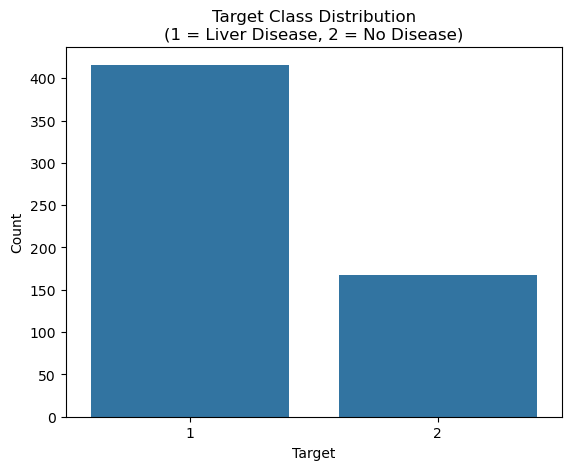

In [240]:
# Visualizing Target Distribution

sns.countplot(x='Target', data=df)
plt.title('Target Class Distribution\n(1 = Liver Disease, 2 = No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


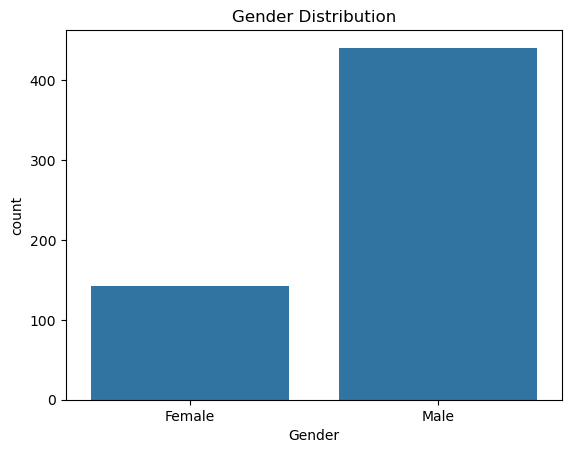

In [241]:
# Visualizing Gender Distribution

sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


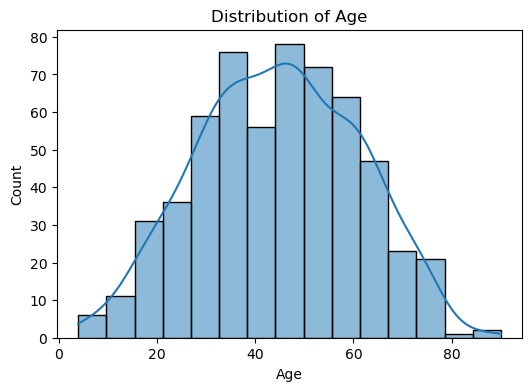

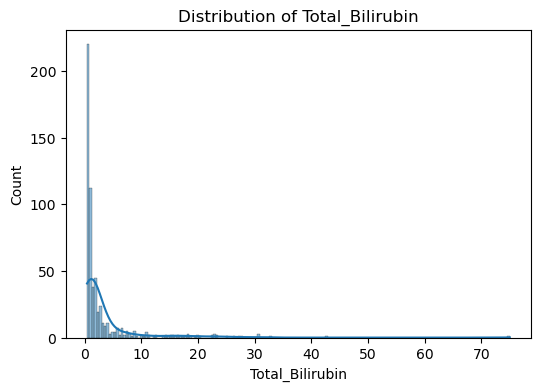

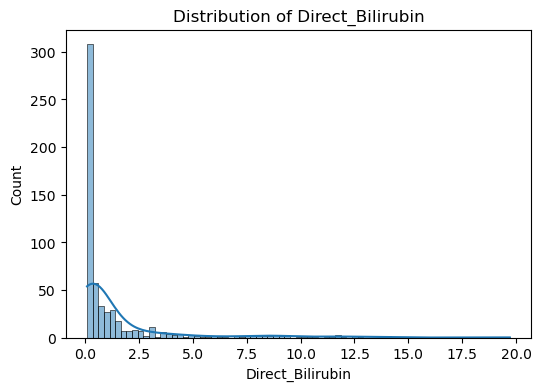

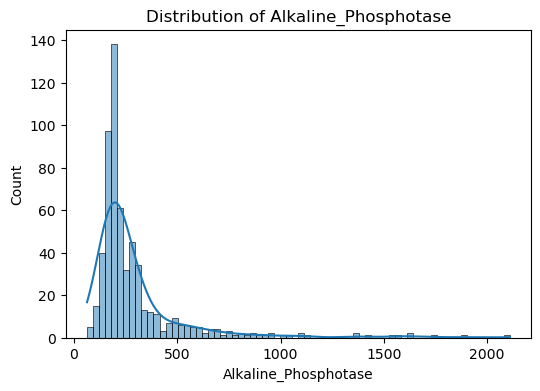

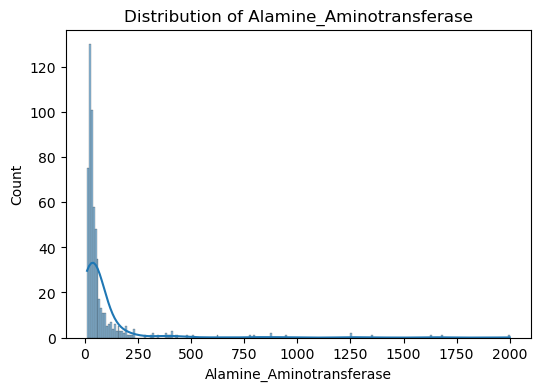

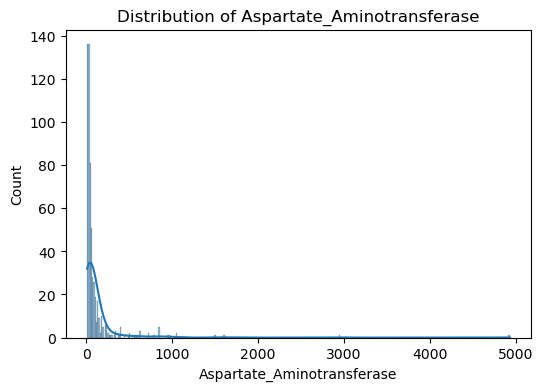

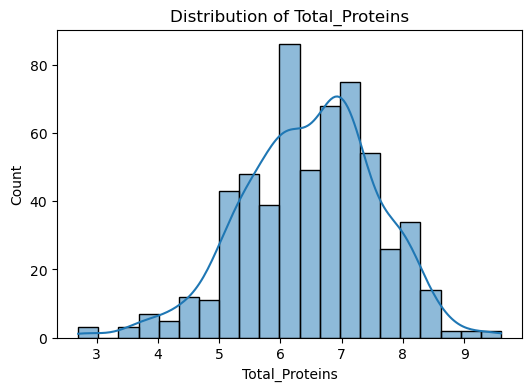

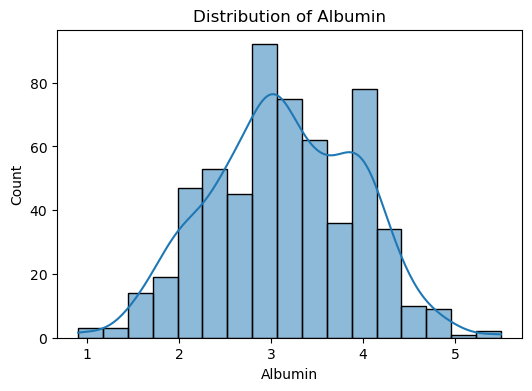

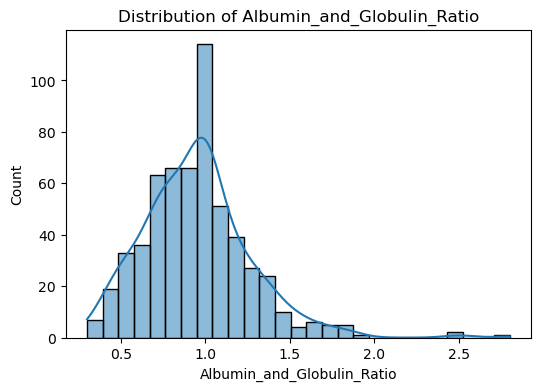

In [242]:
# Distribution Plots for Numeric Features

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('Target')  

for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [ ]:
## Outlier Detection
Using IQR method to detect and remove outliers.

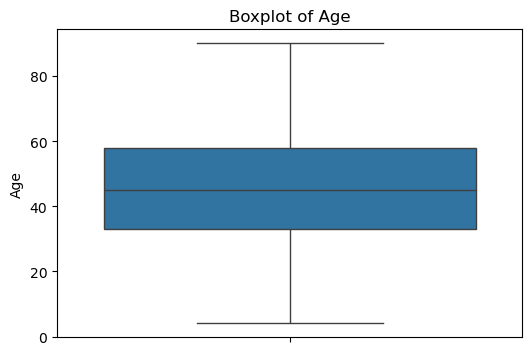

In [244]:
# Outliers Detection

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Age')
plt.title('Boxplot of Age')
plt.show()


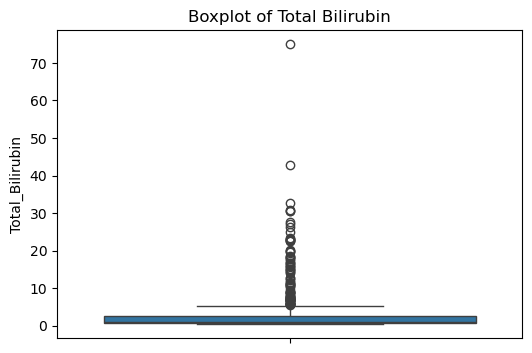

In [245]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Total_Bilirubin')
plt.title('Boxplot of Total Bilirubin')
plt.show()


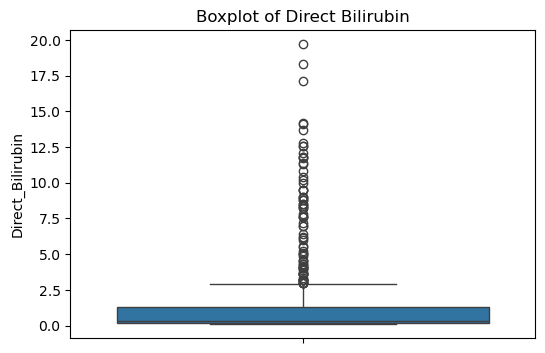

In [246]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Direct_Bilirubin')
plt.title('Boxplot of Direct Bilirubin')
plt.show()


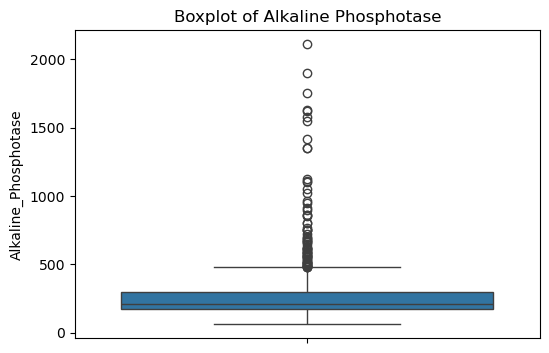

In [247]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Alkaline_Phosphotase')
plt.title('Boxplot of Alkaline Phosphotase')
plt.show()


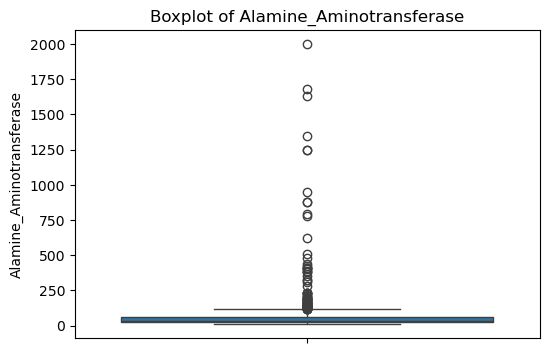

In [248]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Alamine_Aminotransferase')
plt.title('Boxplot of Alamine_Aminotransferase')
plt.show()


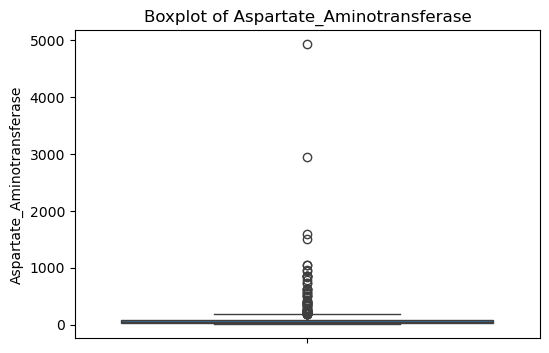

In [249]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Aspartate_Aminotransferase')
plt.title('Boxplot of Aspartate_Aminotransferase')
plt.show()

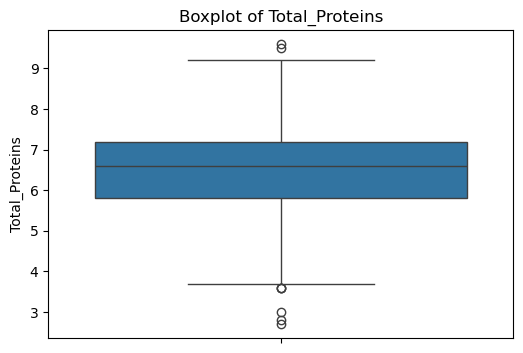

In [250]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Total_Proteins')
plt.title('Boxplot of Total_Proteins')
plt.show()

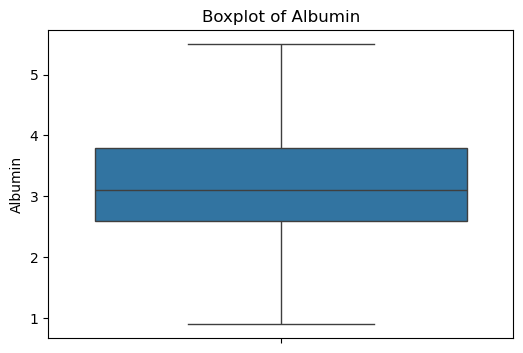

In [251]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Albumin')
plt.title('Boxplot of Albumin')
plt.show()

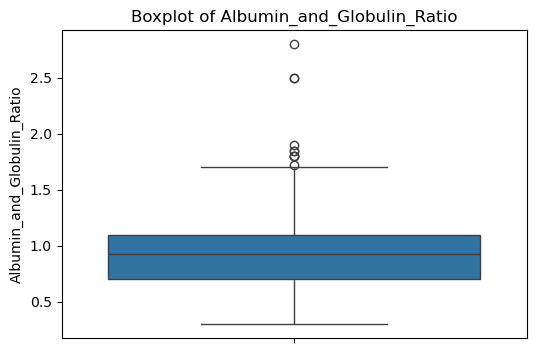

In [252]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Albumin_and_Globulin_Ratio')
plt.title('Boxplot of Albumin_and_Globulin_Ratio')
plt.show()

In [ ]:
## Handling Outliers using IQR Method

In [254]:
# Removing outliers from Total_Bilirubin

Q1 = df['Total_Bilirubin'].quantile(0.25)
Q3 = df['Total_Bilirubin'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['Total_Bilirubin'] >= lower_limit) & (df['Total_Bilirubin'] <= upper_limit)]


In [348]:
# Removing outliers from Alkaline_Phosphotase
Q1 = df['Alkaline_Phosphotase'].quantile(0.25)
Q3 = df['Alkaline_Phosphotase'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['Alkaline_Phosphotase'] >= lower_limit) & (df['Alkaline_Phosphotase'] <= upper_limit)]


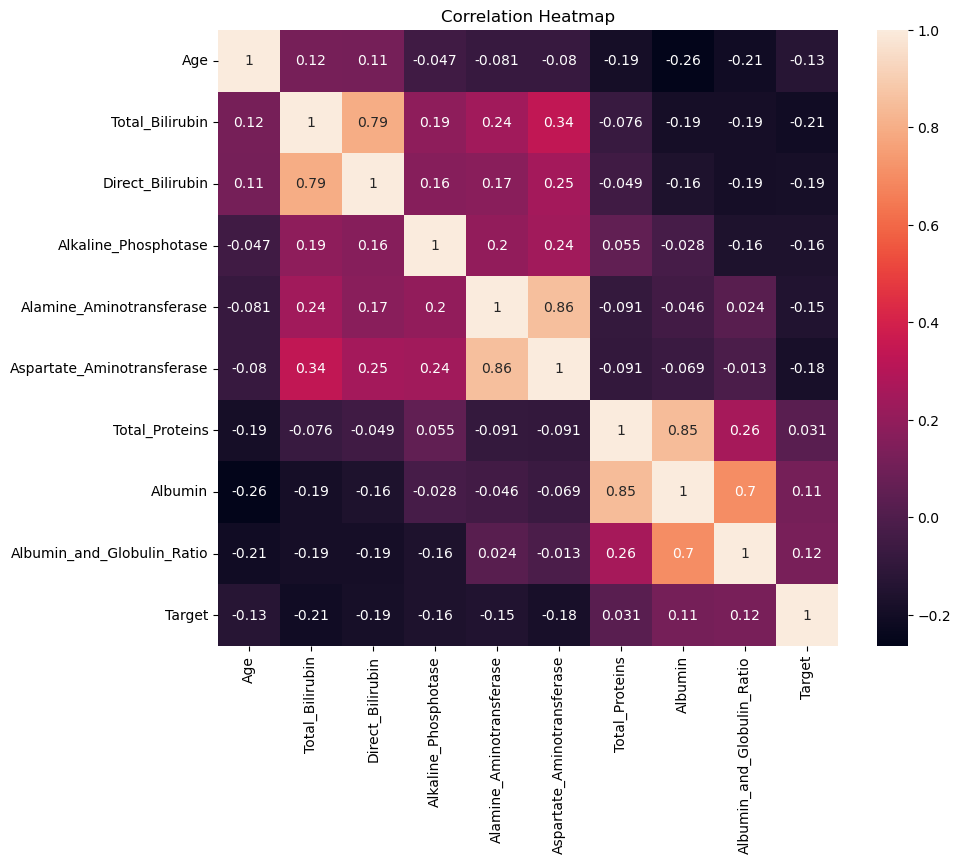

In [256]:
# Correlation Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features + ['Target']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


## Data Preprocessing
Encoding categorical variables and feature scaling.

In [258]:
# Handling missing values

df.loc[df['Albumin_and_Globulin_Ratio'].isnull(), 'Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].median()


In [259]:
# Encoding categorical variables

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [260]:
# Changing target column labeled as 1 = liver disease and 2 = no disease to 1 and 0 

# Converting 2 (no liver disease) to 0
df['Target'] = df['Target'].map({1: 1, 2: 0})


In [261]:
# spliting data into features (x) and target (y)

X = df.drop('Target', axis=1)
y = df['Target']

In [262]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=40, stratify=y)


In [263]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [264]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.9,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.0,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.4,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.3,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
571,90,1,1.1,0.3,215,46,134,6.9,3.0,0.7,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.1,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.0,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.0,1


In [ ]:
## Model Training and Evaluation
Training multiple classification models and evaluating their performance.

In [ ]:
## Logistic Regression

In [267]:
# Initializing and Training the Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

In [268]:
# Making Predictions

y_pred_log_reg = log_reg.predict(X_test_scaled)


In [269]:
# Evaluating the Model

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_pred_log_reg))
print("Confusion Matrix:",confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Performance:
Accuracy: 0.6222222222222222
Precision: 0.6714285714285714
Recall: 0.8103448275862069
F1 Score: 0.734375
Confusion Matrix: [[ 9 23]
 [11 47]]


## Support Vector Machine

In [271]:
# Initializing and Training the Model

from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True)  
svm_model.fit(X_train_scaled, y_train)


SVC(probability=True)

In [272]:
# Making Predictions

y_pred_svm = svm_model.predict(X_test_scaled)


In [273]:
# Evaluating the Model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Confusion Matrix:",confusion_matrix(y_test, y_pred_log_reg))

SVM Model Performance:
Accuracy: 0.6333333333333333
Precision: 0.6470588235294118
Recall: 0.9482758620689655
F1 Score: 0.7692307692307693
Confusion Matrix: [[ 9 23]
 [11 47]]


## K-Nearest Neighbors (KNN) 

In [275]:
# Initializing and Training the Model

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [276]:
# Making Predictions

y_pred_knn = knn_model.predict(X_test_scaled)

In [277]:
# Evaluating the Model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("KNN Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_knn))


KNN Model Performance:
Accuracy: 0.6222222222222222
Precision: 0.6818181818181818
Recall: 0.7758620689655172
F1 Score: 0.7258064516129032
Confusion Matrix: [[11 21]
 [13 45]]


## Naive Bayes

In [279]:
# Initializing and Training the Model

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)


GaussianNB()

In [280]:
# Making Predictions

y_pred_nb = nb_model.predict(X_test_scaled)


In [281]:
# Evaluating the Model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Naive Bayes Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_nb))

Naive Bayes Model Performance:
Accuracy: 0.5222222222222223
Precision: 0.8
Recall: 0.3448275862068966
F1 Score: 0.4819277108433735
Confusion Matrix: [[27  5]
 [38 20]]


In [ ]:
## Model Performance Comparison

We compare all models using accuracy, precision, recall, and F1-score to select the best one.

In [283]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log_reg),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_nb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log_reg),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_nb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log_reg),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_nb)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log_reg),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_nb)
    ]
})

# Sort by F1 Score (or Recall, depending on your focus)
model_results.sort_values(by='Recall', ascending=False, inplace=True)
model_results.reset_index(drop=True, inplace=True)

# Show the final comparison
model_results



,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.633333,0.647059,0.948276,0.769231
1,Logistic Regression,0.622222,0.671429,0.810345,0.734375
2,KNN,0.622222,0.681818,0.775862,0.725806
3,Naive Bayes,0.522222,0.800000,0.344828,0.481928


## Selecting the Best Model

In [285]:
# based on recall 
best_model = svm_model

## Final model evaluation

In [287]:
#  using roc(receiver operating characteristic) curve and auc(area under curve) score

from sklearn.metrics import roc_curve, roc_auc_score

In [288]:
# predicting probabilites 

y_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # probability for class 1


## ROC Curve and AUC Score
The best-performing model is evaluated using ROC curve and AUC to measure classification performance.

In [290]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

print("AUC Score:", auc_score)


AUC Score: 0.5942887931034483


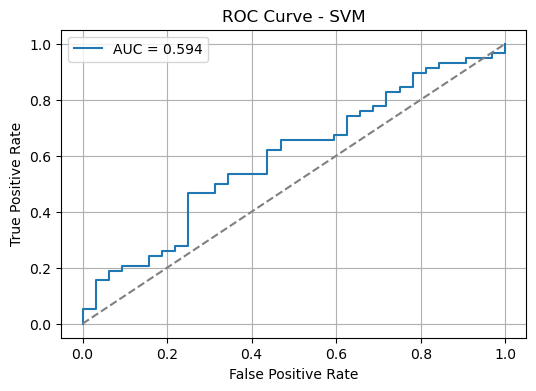

In [291]:
# plotting roc curve

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal
plt.title("ROC Curve - SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

## LightGBM

In [293]:
# Initializing and Training the Model

from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train_scaled, y_train)


[LightGBM] [Info] Number of positive: 233, number of negative: 127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.647222 -> initscore=0.606851
[LightGBM] [Info] Start training from score 0.606851
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier(random_state=42)

In [294]:
# Pridicting and Evaluating

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_lgb = lgb_model.predict(X_test_scaled)

print("LightGBM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1 Score:", f1_score(y_test, y_pred_lgb))


LightGBM Performance:
Accuracy: 0.6555555555555556
Precision: 0.7142857142857143
Recall: 0.7758620689655172
F1 Score: 0.743801652892562


## ROC Curve and AUC Score

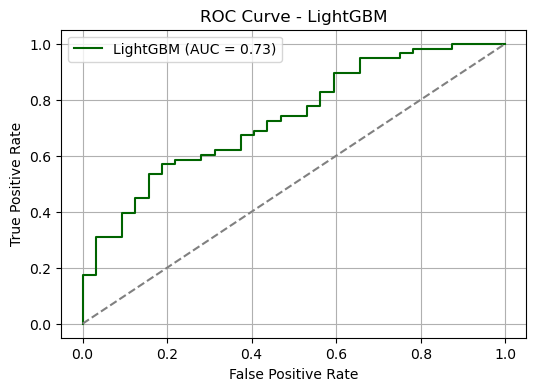

In [296]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_lgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkgreen', label=f'LightGBM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend()
plt.grid(True)
plt.show()


## Final Model Selection and Justification

After comparing multiple models, I selected **LightGBM** as the final model for this project. It provided a strong balance between accuracy, precision, recall, and F1-score. Most importantly, it achieved a significantly better **AUC score of 0.73** compared to SVM’s 0.59, indicating more reliable classification performance.

This confirms LightGBM as the best model for predicting liver disease in this dataset.


## Final Model ROC Curve
The ROC curve for LightGBM showed an **AUC of 0.73**, indicating good balance between sensitivity and specificity. This supports LightGBM as the most reliable model for this classification task.


## Final Model Selection

After comparing Logistic Regression, SVM, KNN, Naive Bayes, and LightGBM:

- LightGBM had the best **AUC (0.73)**  
- Achieved high **F1-score (0.74)** and **precision (0.71)**
- Provided consistent and balanced results

Hence, **LightGBM was selected as the final model**.


## Challenges Faced

- Handling missing and outlier values without losing too much data
- Dealing with slight class imbalance
- Selecting the best model when many had similar F1-scores
- Choosing between recall and AUC for final evaluation


## Techniques Used to Solve Challenges:

- Missing Values: Handled missing values using mean imputation to ensure no data loss while maintaining dataset consistency.

- Outlier Detection: Applied the IQR method on selected numeric features to remove extreme values and improve model stability.

- Model Evaluation: Compared multiple classification models using F1-score, recall, and AUC to choose the most balanced performer.

- Feature Scaling: Used StandardScaler to normalize feature values and improve performance for distance-based models like KNN and SVM.

- Final Model Selection: Chose LightGBM based on its balanced performance across metrics and higher AUC score after comparison.



## Project Summary and Conclusion: Liver Patient Prediction

### Objective:
The goal of this project was to develop a machine learning model to predict whether a patient has liver disease based on various clinical and biochemical features. Early detection of liver disease can support better diagnosis and treatment planning.

### Dataset Summary:
- The dataset contained 583 records and 11 columns, including features like Age, Gender, Total Bilirubin, Alkaline Phosphotase, Albumin, and a binary target (`Target`), where:
  - `1` indicates a patient with liver disease
  - `0` indicates no disease
- The dataset had missing values and mild class imbalance.

### Key Steps Followed:
1. **Data Cleaning**: Handled missing values using mean imputation for features like `Albumin` and `Albumin_and_Globulin_Ratio`.
2. **Outlier Detection**: Applied the IQR method to selected features to remove extreme values.
3. **EDA**: Conducted value counts, boxplots, and summary statistics to understand feature distributions.
4. **Preprocessing**: Encoded the Gender column and scaled features using StandardScaler.
5. **Model Training**: Built and evaluated multiple models — Logistic Regression, SVM, KNN, Naive Bayes, and LightGBM.
6. **Model Comparison**: Evaluated all models using Accuracy, Precision, Recall, F1-score, and AUC.
7. **Final Model Selection**: Selected **LightGBM** as the final model based on its high F1-score and AUC (0.73).
8. **ROC Curve**: Plotted the ROC curve for the final model to visualize classification performance.

### Possible Future Improvements:
- Using domain-specific or named features for deeper medical insights.
- Applying feature selection or creating new features (e.g., ratios, age groups).
- Hyperparameter tuning across all models.
- Deploying the model via a web interface for real-time use.

                                 
                                 